# Ejercicio Procesamiento del Lenguaje Natural


## Analizaremos los titulares del diario Perfil

# Que vamos a hacer:
<ul><li>1 - Cargar los datos</li>
    <li>2 - Limpiar datos </li>
    <li>3 - Analisis Exploratorio</li>
    <li>4 - Anáisis de Sentimiento</li>

In [31]:
%%time
# importamos librerias utiles
import requests
import pickle
from time import sleep

CPU times: user 285 ms, sys: 7.86 ms, total: 293 ms
Wall time: 291 ms


## Perfil

# 1 - Cargar los Datos

In [32]:
%%time
# lo metemos en un Panda dataframe
import pandas as pd
pd.set_option('max_colwidth',150)
import pickle
# Cargamos el csv de los titulares de La Nacion en un dataframe

data_pe = pd.read_csv('pe_por_year_2.csv',index_col=0 )
data_pe.index.name=None
data_pe

CPU times: user 28.7 ms, sys: 4.13 ms, total: 32.9 ms
Wall time: 110 ms


,Texto
2006,córdoba alianza delasotista se impone en marcos juarez el reclutamiento docente cae en picada relatos de una obsesión ya no podía entrar al aul...
2007,la historia se repite más de cien heridos con quemaduras de pirotecnia y lesiones en los ojos el primer bebé del año nació en buenos aires quemar...
2008,atentados y operativos de seguridad oscurecen festejos el primer bebé porteño del año nació en parque patricios un motociclista perdió la vida al ...
2009,balas perdidas corchos riñas callejeras e incidentes con pirotecnia en los festejos de fin de año cromañon en bangkok muertos en una discoteca...
2010,peajes bien chévere los placeres mínimos de cada día para estar saludables mateo ramos se postula para ser el primer bebé de voraz incendio en be...
2011,toman otro predio en villa lugano durante los festejos de año nuevo hoy asume dilma rousseff en brasil en santiago del estero el arrancó con un s...
2012,murió el gobernador de río negro quién asume el gobierno en río negro primeros detalles y repercusiones de la confusa muerte de soria carlos soria...
2013,pablo echarri la militancia me llegó tarde a los infografía feriados encuentran muerto al andinista perdido en el aconcagua boudou pasó el...
2014,no creo que haya amor creo que hay propiedad privada y no me la toca nadie la verdad mexicana no es un lujo es algo que necesito la conferenci...
2015,caso lola aseguran que es extremadamente complicado choque y vuelco fatal en camino del buen ayre boudou el embajador en la reasunción de di...


In [69]:
%%time
# Veamos uno de los contenidos
data_pe.Texto.loc[2008]

CPU times: user 622 µs, sys: 14 µs, total: 636 µs
Wall time: 650 µs


'atentados y operativos de seguridad oscurecen festejos el primer bebé porteño del año nació en parque patricios un motociclista perdió la vida al chocar con un patrullero fue a comprar hielo para la cena y murió electrocutado  córdoba  siete adultos y cinco niños con heridas leves un joven mató a sus ex suegros mientras festejaban asambleístas de gualeguaychú cenaron en familia dos hombres asesinados a cuchillazos en córdoba el año empieza con más calor y probabilidad de lluvias martín palermo  \x93nunca soñé con ganar tantas cosas\x94  benedicto xvi volvió a defender a la  familia natural  los medios internacionales se hacen eco del fracaso al menos  personas quemadas vivas en una iglesia nuevas pistas en el caso maddie y apuntan a marruecos lindsay lohan fue elegida la peor actriz del año quedaron heridos luego de chocar y les robaron ni los funerales se salvan de los atentados en irak boca define el pase de banega al valencia  de españa las ventas minoristas aumentaron   en diciemb

# 3 - Limpiar los Datos

In [34]:
%%time
# Aplicaremos varios rounds de limpieza
import re
import string

def clean_text_round1(text):
    '''Elimina todo lo que no es texto'''
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

CPU times: user 338 µs, sys: 0 ns, total: 338 µs
Wall time: 78.2 µs


In [35]:
%%time
# vemos la primer limpieza
data_pe_clean = pd.DataFrame(data_pe.Texto.apply(round1))
data_pe_clean

CPU times: user 127 ms, sys: 39 µs, total: 127 ms
Wall time: 126 ms


,Texto
2006,córdoba alianza delasotista se impone en marcos juarez el reclutamiento docente cae en picada relatos de una obsesión ya no podía entrar al aul...
2007,la historia se repite más de cien heridos con quemaduras de pirotecnia y lesiones en los ojos el primer bebé del año nació en buenos aires quemar...
2008,atentados y operativos de seguridad oscurecen festejos el primer bebé porteño del año nació en parque patricios un motociclista perdió la vida al ...
2009,balas perdidas corchos riñas callejeras e incidentes con pirotecnia en los festejos de fin de año cromañon en bangkok muertos en una discoteca...
2010,peajes bien chévere los placeres mínimos de cada día para estar saludables mateo ramos se postula para ser el primer bebé de voraz incendio en be...
2011,toman otro predio en villa lugano durante los festejos de año nuevo hoy asume dilma rousseff en brasil en santiago del estero el arrancó con un s...
2012,murió el gobernador de río negro quién asume el gobierno en río negro primeros detalles y repercusiones de la confusa muerte de soria carlos soria...
2013,pablo echarri la militancia me llegó tarde a los infografía feriados encuentran muerto al andinista perdido en el aconcagua boudou pasó el...
2014,no creo que haya amor creo que hay propiedad privada y no me la toca nadie la verdad mexicana no es un lujo es algo que necesito la conferenci...
2015,caso lola aseguran que es extremadamente complicado choque y vuelco fatal en camino del buen ayre boudou el embajador en la reasunción de di...


In [36]:
%%time
# Segundo round
def clean_text_round2(text):
    '''Removemos otros caracteres adicionales'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

CPU times: user 33 µs, sys: 1e+03 ns, total: 34 µs
Wall time: 48.4 µs


In [37]:
%%time
# veamos como queda
data_pe_clean = pd.DataFrame(data_pe_clean.Texto.apply(round2))
data_pe_clean

CPU times: user 17.6 ms, sys: 34 µs, total: 17.7 ms
Wall time: 16.5 ms


,Texto
2006,córdoba alianza delasotista se impone en marcos juarez el reclutamiento docente cae en picada relatos de una obsesión ya no podía entrar al aul...
2007,la historia se repite más de cien heridos con quemaduras de pirotecnia y lesiones en los ojos el primer bebé del año nació en buenos aires quemar...
2008,atentados y operativos de seguridad oscurecen festejos el primer bebé porteño del año nació en parque patricios un motociclista perdió la vida al ...
2009,balas perdidas corchos riñas callejeras e incidentes con pirotecnia en los festejos de fin de año cromañon en bangkok muertos en una discoteca...
2010,peajes bien chévere los placeres mínimos de cada día para estar saludables mateo ramos se postula para ser el primer bebé de voraz incendio en be...
2011,toman otro predio en villa lugano durante los festejos de año nuevo hoy asume dilma rousseff en brasil en santiago del estero el arrancó con un s...
2012,murió el gobernador de río negro quién asume el gobierno en río negro primeros detalles y repercusiones de la confusa muerte de soria carlos soria...
2013,pablo echarri la militancia me llegó tarde a los infografía feriados encuentran muerto al andinista perdido en el aconcagua boudou pasó el...
2014,no creo que haya amor creo que hay propiedad privada y no me la toca nadie la verdad mexicana no es un lujo es algo que necesito la conferenci...
2015,caso lola aseguran que es extremadamente complicado choque y vuelco fatal en camino del buen ayre boudou el embajador en la reasunción de di...


In [38]:
%%time
# Como no tenemos un Lemmatizer en español, hacemos manualmente algunas conversiones
# OJO: esto realmente no se hace a mano!!!

def detectadas(palabra):
    eliminar_s = ('libreros','textos','papelitos','monedas','páginas','anécdotas','perros','cuadernos','blogs',
                  'revistas','caballos','vecinos','madres','puntos','ricos','libros')
    if palabra in eliminar_s :
        return palabra[:-1]
    eliminar_es = ('mundiales','lectores','campeones','maníes','ustedes','autores')
    if palabra in eliminar_es:
        return palabra[:-2]
    return palabra

def clean_text_round3(text):
    ''''''
    return " ".join([detectadas(word) for word in text.split()])
    
round3 = lambda x: clean_text_round3(x)

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 21.7 µs


In [39]:
%%time
#vemos como queda
data_pe_clean = pd.DataFrame(data_pe_clean.Texto.apply(round3))
data_pe_clean

CPU times: user 87 ms, sys: 53 µs, total: 87.1 ms
Wall time: 89.5 ms


,Texto
2006,córdoba alianza delasotista se impone en marcos juarez el reclutamiento docente cae en picada relatos de una obsesión ya no podía entrar al aula e...
2007,la historia se repite más de cien heridos con quemaduras de pirotecnia y lesiones en los ojos el primer bebé del año nació en buenos aires quemaro...
2008,atentados y operativos de seguridad oscurecen festejos el primer bebé porteño del año nació en parque patricios un motociclista perdió la vida al ...
2009,balas perdidas corchos riñas callejeras e incidentes con pirotecnia en los festejos de fin de año cromañon en bangkok muertos en una discoteca mur...
2010,peajes bien chévere los placeres mínimos de cada día para estar saludables mateo ramos se postula para ser el primer bebé de voraz incendio en ber...
2011,toman otro predio en villa lugano durante los festejos de año nuevo hoy asume dilma rousseff en brasil en santiago del estero el arrancó con un si...
2012,murió el gobernador de río negro quién asume el gobierno en río negro primeros detalles y repercusiones de la confusa muerte de soria carlos soria...
2013,pablo echarri la militancia me llegó tarde a los infografía feriados encuentran muerto al andinista perdido en el aconcagua boudou pasó el año nue...
2014,no creo que haya amor creo que hay propiedad privada y no me la toca nadie la verdad mexicana no es un lujo es algo que necesito la conferencia de...
2015,caso lola aseguran que es extremadamente complicado choque y vuelco fatal en camino del buen ayre boudou el embajador en la reasunción de dilma lo...


In [40]:
%%time
# Esto es un nuevo campo por si quisieramos agregar alguna info adicional a cada año
# Nuestro caso repetimos los años, nos servirá para alguna visualización
full_names = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']

data_pe['full_name'] = full_names
data_pe

CPU times: user 3.25 ms, sys: 72 µs, total: 3.32 ms
Wall time: 2.52 ms


,Texto,full_name
2006,córdoba alianza delasotista se impone en marcos juarez el reclutamiento docente cae en picada relatos de una obsesión ya no podía entrar al aul...,2006
2007,la historia se repite más de cien heridos con quemaduras de pirotecnia y lesiones en los ojos el primer bebé del año nació en buenos aires quemar...,2007
2008,atentados y operativos de seguridad oscurecen festejos el primer bebé porteño del año nació en parque patricios un motociclista perdió la vida al ...,2008
2009,balas perdidas corchos riñas callejeras e incidentes con pirotecnia en los festejos de fin de año cromañon en bangkok muertos en una discoteca...,2009
2010,peajes bien chévere los placeres mínimos de cada día para estar saludables mateo ramos se postula para ser el primer bebé de voraz incendio en be...,2010
2011,toman otro predio en villa lugano durante los festejos de año nuevo hoy asume dilma rousseff en brasil en santiago del estero el arrancó con un s...,2011
2012,murió el gobernador de río negro quién asume el gobierno en río negro primeros detalles y repercusiones de la confusa muerte de soria carlos soria...,2012
2013,pablo echarri la militancia me llegó tarde a los infografía feriados encuentran muerto al andinista perdido en el aconcagua boudou pasó el...,2013
2014,no creo que haya amor creo que hay propiedad privada y no me la toca nadie la verdad mexicana no es un lujo es algo que necesito la conferenci...,2014
2015,caso lola aseguran que es extremadamente complicado choque y vuelco fatal en camino del buen ayre boudou el embajador en la reasunción de di...,2015


In [41]:
%%time
# Hacemos el pickle para usar más adelante
data_pe.to_pickle("corpus_pe.pkl")

CPU times: user 9.97 ms, sys: 4.07 ms, total: 14 ms
Wall time: 11.4 ms


In [42]:
%%time
data_pe.Texto[0:255]

CPU times: user 1.91 ms, sys: 43 µs, total: 1.95 ms
Wall time: 1.59 ms


2006    córdoba  alianza delasotista se impone en marcos juarez el reclutamiento docente cae en picada relatos de una obsesión   ya no podía entrar al aul...
2007    la historia se repite  más de cien heridos con quemaduras de pirotecnia y lesiones en los ojos el primer bebé del año nació en buenos aires quemar...
2008    atentados y operativos de seguridad oscurecen festejos el primer bebé porteño del año nació en parque patricios un motociclista perdió la vida al ...
2009    balas perdidas  corchos  riñas callejeras e incidentes con pirotecnia en los festejos de fin de año cromañon en bangkok   muertos en una discoteca...
2010    peajes bien chévere los placeres mínimos de cada día para estar saludables mateo ramos se postula para ser el primer bebé de  voraz incendio en be...
2011    toman otro predio en villa lugano durante los festejos de año nuevo hoy asume dilma rousseff en brasil en santiago del estero el  arrancó con un s...
2012    murió el gobernador de río negro quién asume

In [43]:
%%time
# Creamos una matriz de palabras y quitamos las palabras mas comunes del castellano
from sklearn.feature_extraction.text import CountVectorizer

# En spanish.txt tenemos una lista de palabras comunes 
with open('spanish.txt') as f:
    lines = f.read().splitlines()

cv = CountVectorizer(stop_words=lines)
data_pe_cv = cv.fit_transform(data_pe_clean.Texto)
data_pe_dtm = pd.DataFrame(data_pe_cv.toarray(), columns=cv.get_feature_names())
data_pe_dtm.index = data_pe_clean.index
data_pe_dtm

CPU times: user 132 ms, sys: 7.31 ms, total: 139 ms
Wall time: 138 ms


,aaa,abajo,abal,aballay,abanadonado,abanderada,abandona,abandonada,abandonadas,abandonado,...,últimas,último,últimos,única,únicamente,únicas,único,úselo,útero,útil
2006,0,0,0,0,0,0,0,1,0,0,...,1,4,1,0,0,1,3,0,0,0
2007,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2008,0,1,0,0,0,0,0,0,0,0,...,0,5,2,2,0,0,2,1,0,0
2009,0,1,0,0,0,0,0,0,0,0,...,1,3,0,2,0,0,0,0,0,0
2010,0,0,0,0,0,0,2,0,0,0,...,1,5,3,1,0,1,2,0,0,0
2011,0,0,4,0,0,0,0,0,0,1,...,1,2,2,1,1,0,2,0,0,1
2012,0,0,2,1,0,1,1,0,1,0,...,3,3,1,1,0,0,2,0,0,0
2013,0,1,2,0,0,0,1,0,0,0,...,1,1,2,0,0,0,2,0,0,0
2014,0,1,0,0,0,0,0,0,0,1,...,0,1,0,3,0,0,1,0,0,0
2015,0,1,1,0,1,0,0,0,0,0,...,0,6,1,2,0,0,0,0,0,0


In [44]:
%%time
# Lo guardamos como pickle
data_pe_dtm.to_pickle("dtm_pe.pkl")

CPU times: user 13.4 ms, sys: 4.15 ms, total: 17.5 ms
Wall time: 38.2 ms


In [45]:
%%time
# Lo guardamos como pickle también
data_pe_clean.to_pickle('data_pe_clean.pkl')
pickle.dump(cv, open("cv_pe.pkl", "wb"))

CPU times: user 60.6 ms, sys: 16 ms, total: 76.5 ms
Wall time: 81.9 ms


# 4 - Análisis Exploratorio

In [46]:
%%time
# Vemos la matriz de palabras
import pandas as pd

data_pe = pd.read_pickle('dtm_pe.pkl')
data_pe = data_pe.transpose()
data_pe.head()

CPU times: user 23.5 ms, sys: 78 µs, total: 23.6 ms
Wall time: 21.1 ms


,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
aaa,0,1,0,0,0,0,0,0,0,0,0
abajo,0,0,1,1,0,0,0,1,1,1,0
abal,0,0,0,0,0,4,2,2,0,1,0
aballay,0,0,0,0,0,0,1,0,0,0,0
abanadonado,0,0,0,0,0,0,0,0,0,1,0


In [47]:
%%time
# Buscamos las palabras mas comunes por año
top_dict = {}
for c in data_pe.columns:
    top = data_pe[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

CPU times: user 29.2 ms, sys: 22 µs, total: 29.2 ms
Wall time: 28.1 ms


{2006: [('kirchner', 44),
  ('argentina', 42),
  ('gobierno', 29),
  ('quiere', 24),
  ('dos', 22),
  ('ee', 18),
  ('uu', 18),
  ('tres', 17),
  ('años', 17),
  ('va', 17),
  ('ser', 16),
  ('fernández', 16),
  ('presidente', 16),
  ('san', 16),
  ('ex', 15),
  ('boca', 15),
  ('chávez', 14),
  ('país', 14),
  ('sigue', 14),
  ('nuevo', 14),
  ('final', 14),
  ('ahora', 13),
  ('lula', 13),
  ('ciento', 13),
  ('river', 12),
  ('crisis', 12),
  ('triunfo', 12),
  ('busca', 12),
  ('si', 11),
  ('mujer', 11)],
 2007: [('muertos', 33),
  ('ee', 29),
  ('uu', 29),
  ('chávez', 28),
  ('kirchner', 28),
  ('gobierno', 28),
  ('gerez', 26),
  ('ex', 22),
  ('año', 21),
  ('gran', 18),
  ('dos', 18),
  ('argentina', 18),
  ('uruguay', 18),
  ('isabel', 17),
  ('bush', 17),
  ('caso', 16),
  ('plata', 16),
  ('murió', 15),
  ('años', 15),
  ('saddam', 15),
  ('mujer', 15),
  ('irak', 15),
  ('madrid', 15),
  ('policía', 14),
  ('ahora', 14),
  ('san', 13),
  ('gago', 13),
  ('españa', 13),
  

In [48]:
%%time
# Las mostramos un poco mas ordenadas
for anio, top_words in top_dict.items():
    print(anio)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

2006
kirchner, argentina, gobierno, quiere, dos, ee, uu, tres, años, va, ser, fernández, presidente, san
---
2007
muertos, ee, uu, chávez, kirchner, gobierno, gerez, ex, año, gran, dos, argentina, uruguay, isabel
---
2008
gobierno, cristina, macri, dos, años, chávez, boca, muertos, farc, caso, kirchner, tres, argentina, san
---
2009
cristina, obama, kirchner, gobierno, gaza, dakar, campo, bergara, israel, nuevo, moreno, casa, argentino, cómo
---
2010
redrado, cristina, kirchner, gobierno, cobos, central, sandro, aníbal, banco, murió, macri, justicia, haití, chávez
---
2011
cristina, cfk, gobierno, kirchner, argentina, nuevo, macri, aníbal, murió, brasil, egipto, muerte, punta, mubarak
---
2012
gobierno, cristina, soria, cfk, cómo, años, argentina, malvinas, moyano, murió, boudou, macri, maestra, scioli
---
2013
cristina, cfk, gobierno, cómo, scioli, video, macri, argentina, tras, años, intendente, chávez, once, fragata
---
2014
cristina, gobierno, argentina, nuevo, capitanich, echegara

In [49]:
%%time
# Agregamos esas palabras a la lista de stopwords
from collections import Counter

words = []
for anio in data_pe.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
        
words

CPU times: user 696 µs, sys: 16 µs, total: 712 µs
Wall time: 723 µs


['kirchner',
 'argentina',
 'gobierno',
 'quiere',
 'dos',
 'ee',
 'uu',
 'tres',
 'años',
 'va',
 'ser',
 'fernández',
 'presidente',
 'san',
 'ex',
 'boca',
 'chávez',
 'país',
 'sigue',
 'nuevo',
 'final',
 'ahora',
 'lula',
 'ciento',
 'river',
 'crisis',
 'triunfo',
 'busca',
 'si',
 'mujer',
 'muertos',
 'ee',
 'uu',
 'chávez',
 'kirchner',
 'gobierno',
 'gerez',
 'ex',
 'año',
 'gran',
 'dos',
 'argentina',
 'uruguay',
 'isabel',
 'bush',
 'caso',
 'plata',
 'murió',
 'años',
 'saddam',
 'mujer',
 'irak',
 'madrid',
 'policía',
 'ahora',
 'san',
 'gago',
 'españa',
 'muerte',
 'triple',
 'gobierno',
 'cristina',
 'macri',
 'dos',
 'años',
 'chávez',
 'boca',
 'muertos',
 'farc',
 'caso',
 'kirchner',
 'tres',
 'argentina',
 'san',
 'ex',
 'emmanuel',
 'año',
 'river',
 'menos',
 'primera',
 'bush',
 'quiere',
 'murió',
 'vez',
 'familia',
 'intervención',
 'nueva',
 'rehenes',
 'nuevo',
 'sigue',
 'cristina',
 'obama',
 'kirchner',
 'gobierno',
 'gaza',
 'dakar',
 'campo',
 'ber

In [50]:
Counter(words).most_common()

[('gobierno', 11),
 ('argentina', 10),
 ('dos', 10),
 ('años', 8),
 ('nuevo', 8),
 ('cristina', 8),
 ('kirchner', 7),
 ('murió', 7),
 ('macri', 7),
 ('chávez', 6),
 ('muertos', 6),
 ('cómo', 6),
 ('scioli', 6),
 ('cfk', 5),
 ('tras', 5),
 ('quiere', 4),
 ('tres', 4),
 ('ex', 4),
 ('boca', 4),
 ('si', 4),
 ('año', 4),
 ('caso', 4),
 ('plata', 4),
 ('muerte', 4),
 ('boudou', 4),
 ('ser', 3),
 ('san', 3),
 ('mujer', 3),
 ('dakar', 3),
 ('aníbal', 3),
 ('brasil', 3),
 ('mar', 3),
 ('ee', 2),
 ('uu', 2),
 ('fernández', 2),
 ('país', 2),
 ('sigue', 2),
 ('ahora', 2),
 ('river', 2),
 ('crisis', 2),
 ('bush', 2),
 ('triple', 2),
 ('moreno', 2),
 ('casa', 2),
 ('cobos', 2),
 ('justicia', 2),
 ('dólares', 2),
 ('millones', 2),
 ('punta', 2),
 ('subte', 2),
 ('intendente', 2),
 ('video', 2),
 ('dólar', 2),
 ('nisman', 2),
 ('va', 1),
 ('presidente', 1),
 ('final', 1),
 ('lula', 1),
 ('ciento', 1),
 ('triunfo', 1),
 ('busca', 1),
 ('gerez', 1),
 ('gran', 1),
 ('uruguay', 1),
 ('isabel', 1),
 ('sad

In [51]:
%%time
# Las mas repetidas las descartaremos
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

CPU times: user 275 µs, sys: 0 ns, total: 275 µs
Wall time: 283 µs


['gobierno',
 'argentina',
 'dos',
 'años',
 'nuevo',
 'cristina',
 'kirchner',
 'murió',
 'macri']

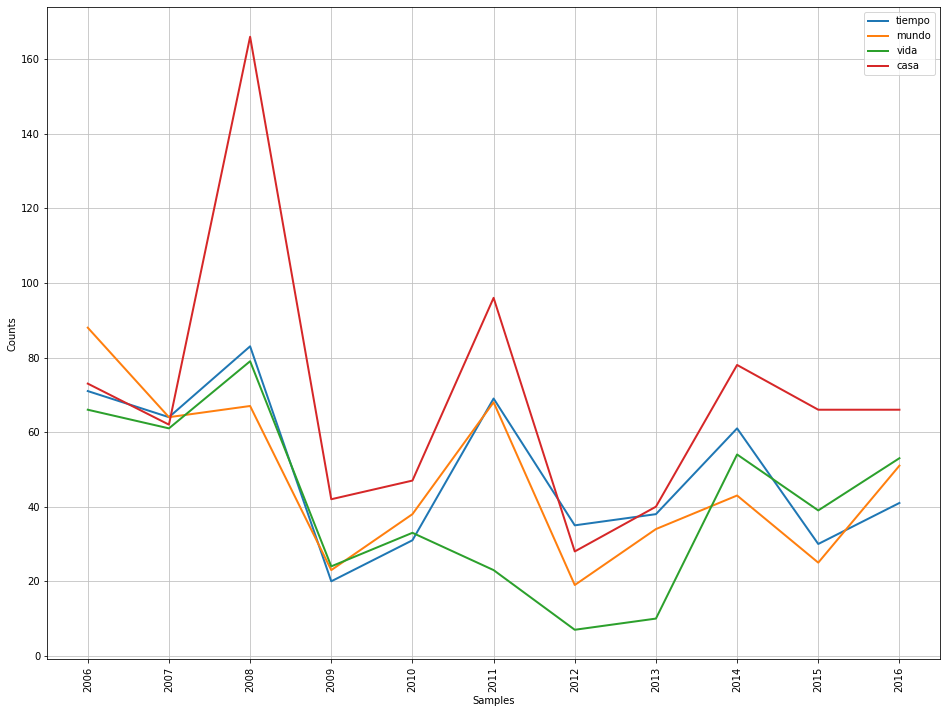

CPU times: user 816 ms, sys: 0 ns, total: 816 ms
Wall time: 813 ms


In [52]:
%%time
# A partir de unos textos genericos, creamos un corpus linguistico (ejemplos de uso)
# usamos un blog
anios = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/home/administrador/git/python/tp_ds/blog/' 
wordlists = PlaintextCorpusReader(corpus_root, '.*', encoding='latin-1')


cfd = nltk.ConditionalFreqDist(
        (word,genre)
        for genre in anios
        for w in wordlists.words(genre + '.txt')
        for word in ['casa','mundo','tiempo','vida']
        if w.lower().startswith(word) )
cfd.plot()

In [53]:
%%time
# Como no alcanzan las palabras del diccionario, debemos agregar mas stopwords
# extraidas manualmente del texto
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Leemos los textos limpios
data_pe_clean = pd.read_pickle('data_pe_clean.pkl')

# Agregamos algunas stopwords de nuestra cosecha
with open('spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['alex','andrés','asi','andres','así','año','alejandro','alfonso','allí','alguien',
                 'basdala','bernardo','bien',
                 'cosa','cosas','costoya','costa','cinco','celoni','cuatro','cómo','casi','colo','caprio','českomoravský','české','costa','canoso','carla','comequechu',
                 'dos','dice','decir','días','dije','digo','diez',
                 'ésa', 'ésas', 'ése', 'ésos', 'ésta', 'éstas', 'éste', 'ésto', 'éstos',
                 'fernando','fenwick',
                 'gelós','gente',
                 'hornby','hoy','horacio','horas','hará','hans','hacía','haber',
                 'iveta',
                 'jesús','jorge','juan',
                 'karen',
                 'lucas','luego', 'luis',
                 'mirta','mientras','menos','mónica','medio','mil','moncho','momento','mañana','mejor',
                 'narcís','número','noche','nadie',
                 'ojos',
                 'primer','primera','pase','pablo','pepe','pack','peter', 'pues','prieto','politto','pol','paola','puede','próximo','podrán','podía',
                 'quizá','quizás','quince','quién','quiero',
                 'rato',
                 'sólo','solamente','sakhan','šeredova','seis','šeredovà','seselovsky','solo','salas','sant','sino','se','sé','sabés','semana','soto','sido','solamente',
                 'tres','tan','todas','trece','toda','todavía','tarde','tener',
                 'uno','usted',
                 'veces','ver','ve','vos','va','voy',
                 'waiser','woung'
                ]
for pal in more_stop_words:
    stop_words.append(pal)


cv = CountVectorizer(stop_words=stop_words)
data_pe_cv = cv.fit_transform(data_pe_clean.Texto)
data_pe_stop = pd.DataFrame(data_pe_cv.toarray(), columns=cv.get_feature_names())
data_pe_stop.index = data_pe_clean.index

# guardamos por las dudas
import pickle
pickle.dump(cv, open("cv_pe_stop.pkl", "wb"))
data_pe_stop.to_pickle("dtm_pe_stop.pkl")

CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 188 ms


In [54]:
%%time
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

CPU times: user 693 µs, sys: 16 µs, total: 709 µs
Wall time: 512 µs


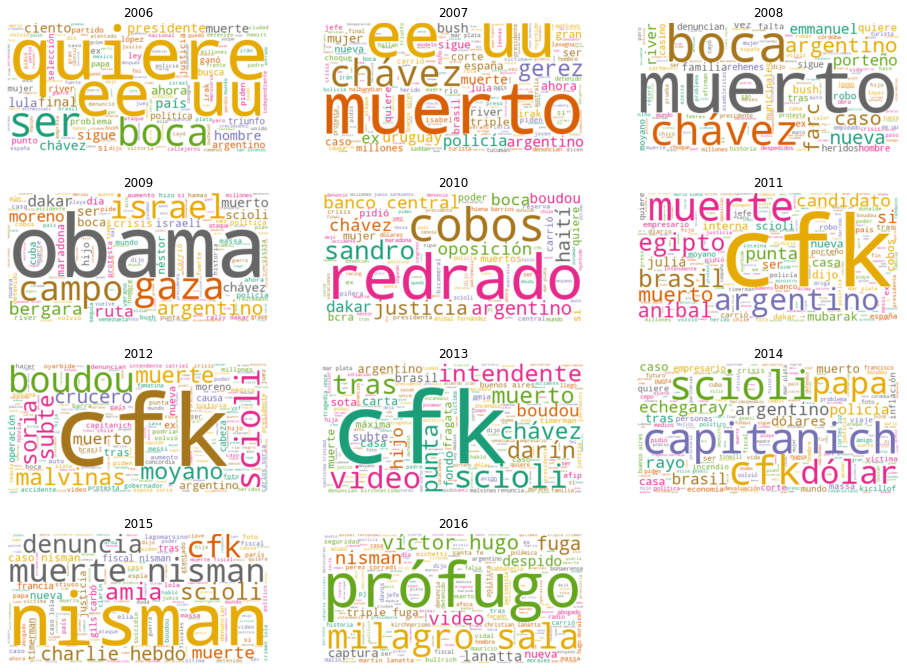

CPU times: user 2.85 s, sys: 92.3 ms, total: 2.94 s
Wall time: 2.95 s


In [55]:
%%time
# Dibujamos las nubes de palabras
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,12]

#anios = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

# Create subplots for each anio
for index, anio in enumerate(data_pe.columns):
    wc.generate(data_pe_clean.Texto[anio])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(anios[index])
    
plt.show()

# 5 - Análisis de Sentimiento

In [56]:
%%time
# Leeremos el corpus que aún preserva el orden de las palabras
import pandas as pd

data_pe = pd.read_pickle('corpus_pe.pkl')
data_pe

CPU times: user 6.39 ms, sys: 58 µs, total: 6.45 ms
Wall time: 4.85 ms


,Texto,full_name
2006,córdoba alianza delasotista se impone en marcos juarez el reclutamiento docente cae en picada relatos de una obsesión ya no podía entrar al aul...,2006
2007,la historia se repite más de cien heridos con quemaduras de pirotecnia y lesiones en los ojos el primer bebé del año nació en buenos aires quemar...,2007
2008,atentados y operativos de seguridad oscurecen festejos el primer bebé porteño del año nació en parque patricios un motociclista perdió la vida al ...,2008
2009,balas perdidas corchos riñas callejeras e incidentes con pirotecnia en los festejos de fin de año cromañon en bangkok muertos en una discoteca...,2009
2010,peajes bien chévere los placeres mínimos de cada día para estar saludables mateo ramos se postula para ser el primer bebé de voraz incendio en be...,2010
2011,toman otro predio en villa lugano durante los festejos de año nuevo hoy asume dilma rousseff en brasil en santiago del estero el arrancó con un s...,2011
2012,murió el gobernador de río negro quién asume el gobierno en río negro primeros detalles y repercusiones de la confusa muerte de soria carlos soria...,2012
2013,pablo echarri la militancia me llegó tarde a los infografía feriados encuentran muerto al andinista perdido en el aconcagua boudou pasó el...,2013
2014,no creo que haya amor creo que hay propiedad privada y no me la toca nadie la verdad mexicana no es un lujo es algo que necesito la conferenci...,2014
2015,caso lola aseguran que es extremadamente complicado choque y vuelco fatal en camino del buen ayre boudou el embajador en la reasunción de di...,2015


In [57]:
%%time
# Creamos funciones auxiliares para procesar el texto
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob
    
pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity

# Realmente lo traducimos al inglés pues el analisis de sentimiento de TextBlob no funciona en Español :(
traducir = lambda x: TextBlob(x).translate(to="en")

data_pe['blob_en'] = data_pe['Texto'].apply(traducir)
data_pe['polarity'] = data_pe['blob_en'].apply(pol2)
data_pe['subjectivity'] = data_pe['blob_en'].apply(sub2)
data_pe

CPU times: user 2.06 s, sys: 12.2 ms, total: 2.07 s
Wall time: 15.3 s


,Texto,full_name,blob_en,polarity,subjectivity
2006,córdoba alianza delasotista se impone en marcos juarez el reclutamiento docente cae en picada relatos de una obsesión ya no podía entrar al aul...,2006,"(c, o, r, d, o, b, a, , d, e, l, a, s, o, t, i, s, t, a, , a, l, l, i, a, n, c, e, , i, m, p, o, s, e, s, , i, t, s, e, l, f, , o, n, , m, a...",0.096154,0.441835
2007,la historia se repite más de cien heridos con quemaduras de pirotecnia y lesiones en los ojos el primer bebé del año nació en buenos aires quemar...,2007,"(h, i, s, t, o, r, y, , r, e, p, e, a, t, s, , m, o, r, e, , t, h, a, n, , o, n, e, , h, u, n, d, r, e, d, , w, o, u, n, d, e, d, , w, i, t...",0.064330,0.408982
2008,atentados y operativos de seguridad oscurecen festejos el primer bebé porteño del año nació en parque patricios un motociclista perdió la vida al ...,2008,"(a, t, t, a, c, k, s, , a, n, d, , s, e, c, u, r, i, t, y, , o, p, e, r, a, t, i, o, n, s, , o, b, s, c, u, r, e, , c, e, l, e, b, r, a, t, i...",0.064545,0.416332
2009,balas perdidas corchos riñas callejeras e incidentes con pirotecnia en los festejos de fin de año cromañon en bangkok muertos en una discoteca...,2009,"(l, o, s, t, , b, u, l, l, e, t, s, , c, o, r, k, s, , s, t, r, e, e, t, , q, u, a, r, r, e, l, s, , a, n, d, , i, n, c, i, d, e, n, t, s, ...",0.063941,0.408875
2010,peajes bien chévere los placeres mínimos de cada día para estar saludables mateo ramos se postula para ser el primer bebé de voraz incendio en be...,2010,"(t, o, l, l, s, , w, e, l, l, , c, o, o, l, , t, h, e, , m, i, n, i, m, u, m, , p, l, e, a, s, u, r, e, s, , o, f, , e, a, c, h, , d, a, y...",0.067944,0.413715
2011,toman otro predio en villa lugano durante los festejos de año nuevo hoy asume dilma rousseff en brasil en santiago del estero el arrancó con un s...,2011,"(t, h, e, y, , t, a, k, e, , a, n, o, t, h, e, r, , p, r, o, p, e, r, t, y, , i, n, , V, i, l, l, a, , L, u, g, a, n, o, , d, u, r, i, n, g...",0.063373,0.415941
2012,murió el gobernador de río negro quién asume el gobierno en río negro primeros detalles y repercusiones de la confusa muerte de soria carlos soria...,2012,"(T, h, e, , g, o, v, e, r, n, o, r, , o, f, , R, í, o, , N, e, g, r, o, , d, i, e, d, ,, , w, h, o, , a, s, s, u, m, e, s, , t, h, e, , g...",0.057627,0.399632
2013,pablo echarri la militancia me llegó tarde a los infografía feriados encuentran muerto al andinista perdido en el aconcagua boudou pasó el...,2013,"(p, a, u, l, , e, c, h, a, r, i, , t, h, e, , m, i, l, i, t, a, n, c, y, , I, , w, a, s, , l, a, t, e, , t, o, , t, h, e, , h, o, l, i, d...",0.111451,0.419632
2014,no creo que haya amor creo que hay propiedad privada y no me la toca nadie la verdad mexicana no es un lujo es algo que necesito la conferenci...,2014,"(I, , d, o, , n, o, t, , t, h, i, n, k, , t, h, e, r, e, , i, s, , l, o, v, e, , I, , t, h, i, n, k, , t, h, e, r, e, , i, s, , p, r, i...",0.047445,0.438419
2015,caso lola aseguran que es extremadamente complicado choque y vuelco fatal en camino del buen ayre boudou el embajador en la reasunción de di...,2015,"(l, o, l, a, , c, a, s, e, , a, s, s, u, r, e, , t, h, a, t, , i, t, , i, s, , e, x, t, r, e, m, e, l, y, , c, o, m, p, l, i, c, a, t, e, d...",0.039250,0.408422


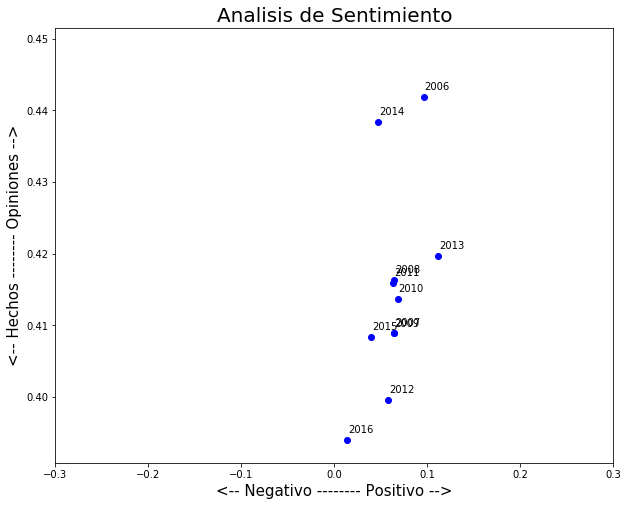

CPU times: user 198 ms, sys: 4.04 ms, total: 202 ms
Wall time: 200 ms


In [60]:
%%time
# Dibujemos los resultados
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, anio in enumerate(data_pe.index):
    x = data_pe.polarity.loc[anio]
    y = data_pe.subjectivity.loc[anio]
    plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, data['full_names'][index], fontsize=10)
    plt.text(x+.001, y+.001, anio, fontsize=10)
    #plt.xlim(-0.051, 0.152) 
    plt.xlim(-0.3, 0.3) 
    
plt.title('Analisis de Sentimiento', fontsize=20)
plt.xlabel('<-- Negativo -------- Positivo -->', fontsize=15)
plt.ylabel('<-- Hechos -------- Opiniones -->', fontsize=15)

plt.show()

## Variacion del sentimiento con el tiempo

In [61]:
%%time
# Partimos cada año en 12 piezas correspondiente a los meses
import numpy as np
import math

def split_text(text, n=12):
        
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

CPU times: user 23 µs, sys: 1e+03 ns, total: 24 µs
Wall time: 33.9 µs


In [62]:
# Veamos que datos tenemos
data_pe

,Texto,full_name,blob_en,polarity,subjectivity
2006,córdoba alianza delasotista se impone en marcos juarez el reclutamiento docente cae en picada relatos de una obsesión ya no podía entrar al aul...,2006,"(c, o, r, d, o, b, a, , d, e, l, a, s, o, t, i, s, t, a, , a, l, l, i, a, n, c, e, , i, m, p, o, s, e, s, , i, t, s, e, l, f, , o, n, , m, a...",0.096154,0.441835
2007,la historia se repite más de cien heridos con quemaduras de pirotecnia y lesiones en los ojos el primer bebé del año nació en buenos aires quemar...,2007,"(h, i, s, t, o, r, y, , r, e, p, e, a, t, s, , m, o, r, e, , t, h, a, n, , o, n, e, , h, u, n, d, r, e, d, , w, o, u, n, d, e, d, , w, i, t...",0.064330,0.408982
2008,atentados y operativos de seguridad oscurecen festejos el primer bebé porteño del año nació en parque patricios un motociclista perdió la vida al ...,2008,"(a, t, t, a, c, k, s, , a, n, d, , s, e, c, u, r, i, t, y, , o, p, e, r, a, t, i, o, n, s, , o, b, s, c, u, r, e, , c, e, l, e, b, r, a, t, i...",0.064545,0.416332
2009,balas perdidas corchos riñas callejeras e incidentes con pirotecnia en los festejos de fin de año cromañon en bangkok muertos en una discoteca...,2009,"(l, o, s, t, , b, u, l, l, e, t, s, , c, o, r, k, s, , s, t, r, e, e, t, , q, u, a, r, r, e, l, s, , a, n, d, , i, n, c, i, d, e, n, t, s, ...",0.063941,0.408875
2010,peajes bien chévere los placeres mínimos de cada día para estar saludables mateo ramos se postula para ser el primer bebé de voraz incendio en be...,2010,"(t, o, l, l, s, , w, e, l, l, , c, o, o, l, , t, h, e, , m, i, n, i, m, u, m, , p, l, e, a, s, u, r, e, s, , o, f, , e, a, c, h, , d, a, y...",0.067944,0.413715
2011,toman otro predio en villa lugano durante los festejos de año nuevo hoy asume dilma rousseff en brasil en santiago del estero el arrancó con un s...,2011,"(t, h, e, y, , t, a, k, e, , a, n, o, t, h, e, r, , p, r, o, p, e, r, t, y, , i, n, , V, i, l, l, a, , L, u, g, a, n, o, , d, u, r, i, n, g...",0.063373,0.415941
2012,murió el gobernador de río negro quién asume el gobierno en río negro primeros detalles y repercusiones de la confusa muerte de soria carlos soria...,2012,"(T, h, e, , g, o, v, e, r, n, o, r, , o, f, , R, í, o, , N, e, g, r, o, , d, i, e, d, ,, , w, h, o, , a, s, s, u, m, e, s, , t, h, e, , g...",0.057627,0.399632
2013,pablo echarri la militancia me llegó tarde a los infografía feriados encuentran muerto al andinista perdido en el aconcagua boudou pasó el...,2013,"(p, a, u, l, , e, c, h, a, r, i, , t, h, e, , m, i, l, i, t, a, n, c, y, , I, , w, a, s, , l, a, t, e, , t, o, , t, h, e, , h, o, l, i, d...",0.111451,0.419632
2014,no creo que haya amor creo que hay propiedad privada y no me la toca nadie la verdad mexicana no es un lujo es algo que necesito la conferenci...,2014,"(I, , d, o, , n, o, t, , t, h, i, n, k, , t, h, e, r, e, , i, s, , l, o, v, e, , I, , t, h, i, n, k, , t, h, e, r, e, , i, s, , p, r, i...",0.047445,0.438419
2015,caso lola aseguran que es extremadamente complicado choque y vuelco fatal en camino del buen ayre boudou el embajador en la reasunción de di...,2015,"(l, o, l, a, , c, a, s, e, , a, s, s, u, r, e, , t, h, a, t, , i, t, , i, s, , e, x, t, r, e, m, e, l, y, , c, o, m, p, l, i, c, a, t, e, d...",0.039250,0.408422


In [63]:
%%time
# Juntamos todos los textos
list_pieces = []
for t in data_pe.blob_en:#transcript:
    split = split_text(t,12)
    list_pieces.append(split)   
#list_pieces

CPU times: user 22.2 ms, sys: 45 µs, total: 22.2 ms
Wall time: 21.6 ms


In [64]:
# Cada lista tiene n elementos
len(list_pieces)

11

In [65]:
# Ahora lo partimos en piezas de 10
len(list_pieces[0])

12

In [66]:
%%time
# Calculamos la polaridad de cada pieza de texto

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        #polarity_piece.append(TextBlob(p).translate(to="en").sentiment.polarity)
        polarity_piece.append(p.sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

CPU times: user 421 ms, sys: 0 ns, total: 421 ms
Wall time: 418 ms


[[0.11719095719095719,
  0.09546678276186475,
  0.0347222222222222,
  0.11645694230439996,
  0.03725399152818508,
  0.2644444444444444,
  0.0,
  0.025,
  0.16666666666666666,
  0.07619047619047618,
  0.18939393939393936,
  0.15],
 [0.07450394354503945,
  0.03789120715350223,
  0.057879453879453875,
  0.11409932659932662,
  0.02393939393939394,
  0.059554730983302405,
  0.19333333333333333,
  0.15,
  0.06666666666666667,
  0.11079545454545453,
  0.07777777777777778,
  0.0],
 [0.09597378941641237,
  0.04980996404725217,
  0.10604031385281387,
  0.053415736310473146,
  0.010527111777111776,
  0.04938973063973063,
  0.1,
  0.25,
  0.0050000000000000044,
  0.18333333333333335,
  0.23333333333333334,
  -0.05000000000000002],
 [0.021179981634527084,
  0.060296717171717175,
  0.08908481365377917,
  0.04274170274170274,
  0.07059483726150392,
  0.1035240800865801,
  0.13999999999999999,
  0.0,
  0.15,
  -0.1,
  0.10000000000000002,
  0.1875],
 [0.05464494442755312,
  0.04303977272727272,
  0.12

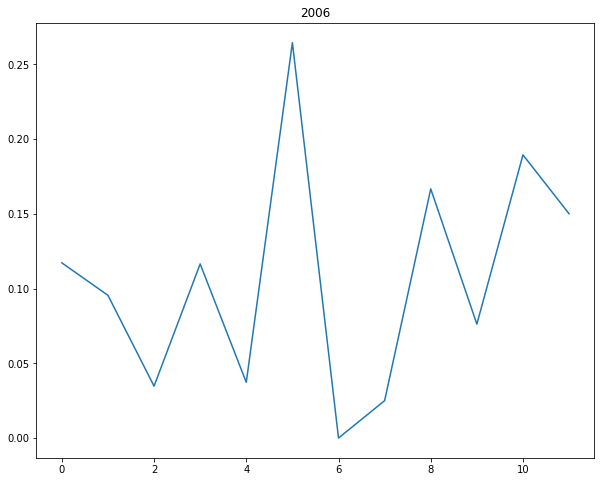

CPU times: user 147 ms, sys: 3.96 ms, total: 151 ms
Wall time: 149 ms


In [67]:
%%time
# Mostramos solo el etalle del primer año
plt.plot(polarity_transcript[0])
plt.title(data_pe['full_name'].index[0])
plt.show()

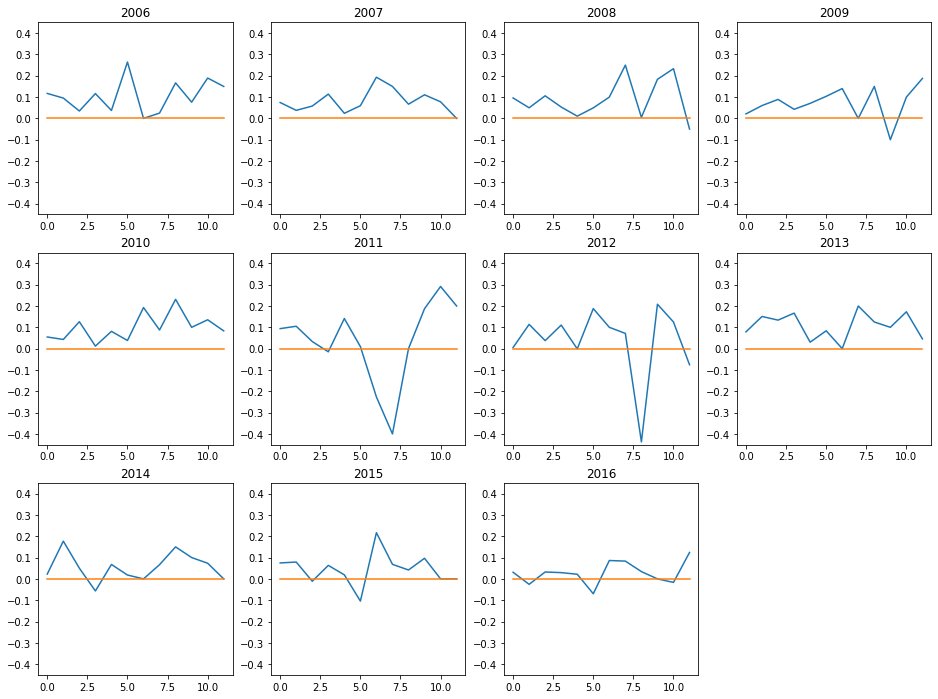

CPU times: user 1.33 s, sys: 7.51 ms, total: 1.33 s
Wall time: 1.33 s


In [68]:
%%time
# Hacemos todos los años
plt.rcParams['figure.figsize'] = [16, 12]

for index, anio in enumerate(data_pe.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,12), np.zeros(12))
    #plt.title(data['full_name'][index])
    plt.title(anio)
    plt.ylim(ymin=-.45, ymax=.45)
    
plt.show()